# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [13]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

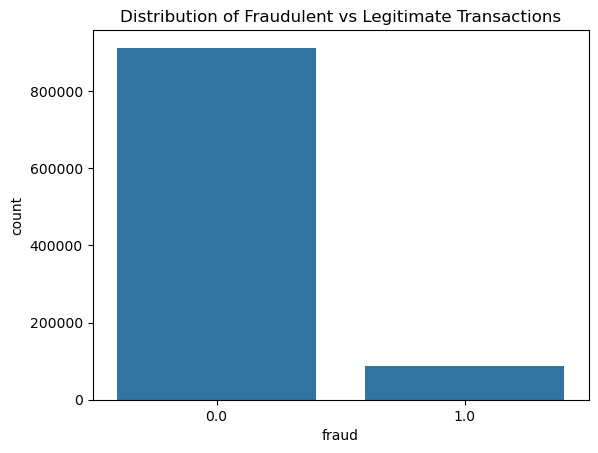

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


In [6]:
# Count plot for the target variable
sns.countplot(x='fraud', data=fraud)
plt.title("Distribution of Fraudulent vs Legitimate Transactions")
plt.show()

# Print the value counts
print(fraud['fraud'].value_counts(normalize=True))

Conclusion: Yes, the dataset is highly imbalanced. This will impact model performance if not handled properly—most models will lean toward predicting the majority class (non-fraud)

In [8]:
# Features and target
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[271937   1842]
 [ 10434  15787]]
              precision    recall  f1-score   support

         0.0     0.9630    0.9933    0.9779    273779
         1.0     0.8955    0.6021    0.7200     26221

    accuracy                         0.9591    300000
   macro avg     0.9293    0.7977    0.8490    300000
weighted avg     0.9571    0.9591    0.9554    300000



In [10]:
# Oversample the minority class
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Split and train again
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42, stratify=y_ros)

lr_ros = LogisticRegression(max_iter=1000)
lr_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = lr_ros.predict(X_test_ros)

# Evaluation
print(confusion_matrix(y_test_ros, y_pred_ros))
print(classification_report(y_test_ros, y_pred_ros, digits=4))

[[255509  18271]
 [ 13837 259942]]
              precision    recall  f1-score   support

         0.0     0.9486    0.9333    0.9409    273780
         1.0     0.9343    0.9495    0.9418    273779

    accuracy                         0.9414    547559
   macro avg     0.9415    0.9414    0.9414    547559
weighted avg     0.9415    0.9414    0.9414    547559



In [12]:
# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

# Split and train again
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)

lr_rus = LogisticRegression(max_iter=1000)
lr_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = lr_rus.predict(X_test_rus)

# Evaluation
print(confusion_matrix(y_test_rus, y_pred_rus))
print(classification_report(y_test_rus, y_pred_rus, digits=4))

[[24468  1753]
 [ 1363 24858]]
              precision    recall  f1-score   support

         0.0     0.9472    0.9331    0.9401     26221
         1.0     0.9341    0.9480    0.9410     26221

    accuracy                         0.9406     52442
   macro avg     0.9407    0.9406    0.9406     52442
weighted avg     0.9407    0.9406    0.9406     52442



In [14]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Train/test split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42, stratify=y_smote)

lr_sm = LogisticRegression(max_iter=1000)
lr_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = lr_sm.predict(X_test_sm)

# Evaluate
print(confusion_matrix(y_test_sm, y_pred_sm))
print(classification_report(y_test_sm, y_pred_sm, digits=4))

[[255728  18052]
 [ 13743 260036]]
              precision    recall  f1-score   support

         0.0     0.9490    0.9341    0.9415    273780
         1.0     0.9351    0.9498    0.9424    273779

    accuracy                         0.9419    547559
   macro avg     0.9420    0.9419    0.9419    547559
weighted avg     0.9420    0.9419    0.9419    547559

